# MNIST Prediction

In [0]:
'''
A bunch of imports.

The csv library is for reading ".csv" files (things like spreadsheets)
keras is our main library for machine learning
numpy is short for number python, and it's a really nice library for all things
mathematical.

Mattplotlib.pyplot is plotting software we'll be using.
'''
import csv
import keras
import numpy as np
import matplotlib.pyplot as plt
import random

## Processing Data
Today, we'll be looking at the MNIST handwrting dataset. Each MNIST image is a handwritten image of size 28 pixels by 28 pixels. 

In [0]:
'''
First, let's load the data. Keras already has a convient mnist importer, so let's
use that.
'''

from keras.datasets import mnist

(x_train, y_train), _ = mnist.load_data()

In [4]:
'''
Look at the shapes. If array a has a shape of (60000, 28, 28) that means that 
every element in this array is a 2D array with shape 28 x 28.

There are also 60000 elements.
'''

# The shape of the handwriting images
print(x_train.shape)
# The shape of the answers
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [0]:
# Let's normalize the images. Before they were in the range of 0 - 255, but we
# want them in the range of 0 - 1.
x_train = np.divide(x_train, 255.0)

In [0]:
# Let's take each 28 x 28 image and flatten it out. (784 = 28 x 28)
x_train = np.reshape(x_train, (60000, 784))

In [0]:
# Just a function to display images. Reshapes the image into a 28x28 2D array
# then uses plt to show the image.

def display_img(x):
  img = x.reshape(28, 28)
  plt.imshow(img)

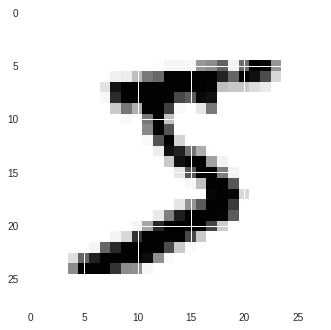

In [13]:
'''
Now let's try displaying the first image. If this works properly, you should see
a pretty shoddy 5.
'''

display_img(x_train[0])

In [0]:
'''
Alright, we're only going to try to distinguish between 0's and 1's. Let's get
rid of all other data.
'''

x_zero = []
x_one = []

for i in range(len(x_train)):
  
  # If the label is a zero, we add the element to x_zero
  if(y_train[i] == 0):
    x_zero.append(x_train[i])
    
  # If the label is a one, we add the element to x_one
  elif(y_train[i] == 1):
    x_one.append(x_train[i])

x_zero = np.array(x_zero)
x_one = np.array(x_one)

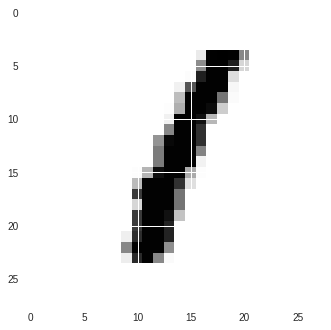

In [19]:
'''
Now let's display some random image in x_one; hopefully this should be a 1...
If you want, you can also try displaying something in x_zero
'''
display_img(x_one[16])

In [0]:
'''
Now let's combine the ones and zeros!
'''
inputs = np.concatenate((x_zero, x_one))
zero_labels = [0 for i in range(len(x_zero))]
one_labels = [1 for i in range(len(x_one))]

outputs = np.array(zero_labels + one_labels)

np.random.seed(0)
np.random.shuffle(inputs)

np.random.seed(0)
np.random.shuffle(outputs)

1


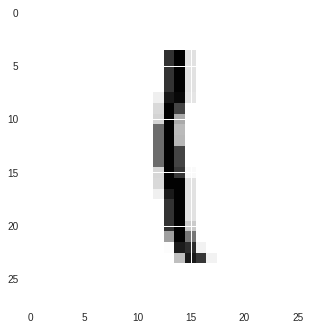

In [26]:
'''
Sanity check, does this image match the label?
'''
idx = 45

print(outputs[idx])
display_img(inputs[idx])

## Building a Model

In [0]:
'''
Now it's time to see what keras can really do! Again, we create a simple 
Sequential keras model. 

A Sequential object is the framework for models in keras. Right now our 
Sequential model is empty, so it won't do anything. We'll need to add 
things into it first.
'''

model = keras.models.Sequential()

In [0]:
'''
A neural network is composed of multiple "Dense" or fully connected layers.
This just means that all neurons of the previous layer are connected to all 
neurons in this layer. 

Note that # of neurons of that layer = # of outputs of that layer (because each neuron outputs exactly one thing.)


'''
neurons1 = 512
neurons2 = 128
neurons3 = 1

# We have the input_shape is a (n x 784) vector, so input_shape is just (784,)
# 'activation' here designates an activation function. There are many different
# type of activation functions. We use "relu", but you can also try 'tanh' or 'sigmoid'
layer1 = keras.layers.Dense(neurons1, input_shape=(784,), activation='relu')
model.add(layer1)

# What this means is that the output of a Dense network gets put through the 
# activation function before moving onto the next layer.

# Just another Dense layer with 128 neurons and a 'relu' activation function
layer2 = keras.layers.Dense(neurons2, activation='relu')
model.add(layer2)

# Finally we end with a Dense network of 1 neuron (because we only want 1 output)
# Note that we sigmoid as our activation function to squash the output between 0 and 1.
layer3 = keras.layers.Dense(neurons3, activation='sigmoid')
model.add(layer3)

In [0]:
'''
We need to compile a model before we run it. "opt" here is an optimizer, basically
a way of getting better. Here, we let opt = Adam, which stands for Adaptive momentum estimation.
(A Glorified version of Gradient Descent)

lr here means "learning rate." This is the step size of your gradient descent. 
If the model isn't training fast enough, try increasing it. If the model is getting
worse, try decreasing it.

Loss is mean squared error. This is what we try to minimize.
'''
opt = keras.optimizers.Adam(lr=0.0003)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_absolute_error'])

### Challenge Notice:
We'll be having a challenge: Who can fit the data the best. Whoever can get the lowest loss wins; the winner will be awarded a lot of candy.

Feel free to change the learning rate, or the structure of the neural networks.

In [39]:
model.fit(inputs, outputs, epochs = 100)


Epoch 1/100
12665/12665 [==============================] - 5s 422us/step - loss: 0.0561 - mean_absolute_error: 0.1661
Epoch 2/100
12665/12665 [==============================] - 5s 398us/step - loss: 0.0028 - mean_absolute_error: 0.0223
Epoch 3/100
12665/12665 [==============================] - 5s 384us/step - loss: 0.0017 - mean_absolute_error: 0.0129
Epoch 4/100
12665/12665 [==============================] - 5s 381us/step - loss: 0.0012 - mean_absolute_error: 0.0093
Epoch 5/100
12665/12665 [==============================] - 5s 390us/step - loss: 9.7103e-04 - mean_absolute_error: 0.0074
Epoch 6/100
12665/12665 [==============================] - 5s 397us/step - loss: 8.4291e-04 - mean_absolute_error: 0.0059
Epoch 7/100
12665/12665 [==============================] - 5s 394us/step - loss: 7.2754e-04 - mean_absolute_error: 0.0050
Epoch 8/100
12665/12665 [==============================] - 5s 387us/step - loss: 5.9409e-04 - mean_absolute_error: 0.0041
Epoch 9/100
12665/12665 [===============

In [0]:
'''
Congradulations! You've trained your first model! Let's see what the code's outputting.

Epoch 24/100
4898/4898 [==============================] - 0s 31us/step - loss: 1.8401 - mean_absolute_error: 1.0712

An epoch is a runthrough of the data. We can see that this is the 24th epoch out of the 100
which it plans to run.

4898 is the total number of examples in our data. To finish an epoch, the model has 
to train on all 4898 datapoints.

The whole epoch took 0s to run for me; it took 31us (microseconds) for each step.

loss: 1.8401 This is the average of the squared error for each datapoint. Note that
it uses squared error because we set loss = 'mean_squared_error' when compiling.

mean_absolute_error: 1.071. This is an error metric we can kinda understand.
On average, it's guesses are around 1 point off the right answer.

So, for instance, if the bottle of wine actually is a 7/10, on average, it might gueses a 6/10.
'''

## Displaying Results
Time to see how we're doing

Guess:
[0.5003034]

Answer
1

Image


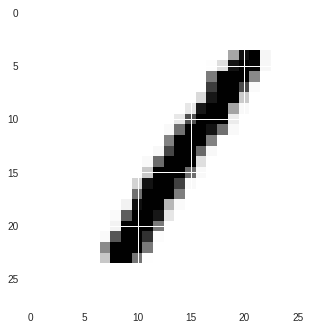

In [38]:
index = random.randint(0, 100)

picture = inputs[index]
answer = outputs[index]

guess = model.predict(np.array([picture]))[0]

print("Guess:")
print(guess)
print("")
print("Answer")
print(answer)
print("")
print("Image")
display_img(picture)



# Boston Housing Prediction
Alright, so in this implementation, you're going to try your hand at building a model and playing around with it.

For future reference, the keras documentation is keras.io and for matplotlib, just google your question.

If you have any question, you can also ask Joshua or Oliver.

## Processing Data
We use the Boston housing dataset from keras.

In [0]:
from keras.datasets import boston_housing

(x_train, y_train), _ = boston_housing.load_data()

# Just normalizing the data to be in the range 0-1.
x_train = keras.utils.normalize(x_train)

## Building a Model
In this subsection, try building your own sequential model and adding dense layers into it.

Then try compiling and running it!


## Displaying Results
In this section, try displaying 
1. the model's answers vs the actual answers
2. the impact each features has in the model.